# **Exercise 1**

## **1. Defining the Question**

### **a) Specifying the Question**

Tasked to clean and perform analysis on this data to create a report detailing the investment opportunities for Airbnb.

### **b) Defining the Metric for Success**

The analysis will be considered a success when interactive visualization which tell a good story from the data highlighting the key investment opportunities.

### **c) Recording the Experimental Design**

The experiantal desigh to be used is the CRISP-DM format:

1. Business understanding

2. Data Understanding

3. Data cleaning

4. Exploratory Data Analysis

### **d) Data Relevance**

The datasets are large enough to be used for analysis, thus promising a better outcome

### **e) Reading the Data**

In [50]:
# imporing the relevant datasets

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [51]:
# reading the datasets

listings = pd.read_csv('/content/Listings.csv', encoding='ISO-8859–1')

listings.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1.0,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [52]:
reviews = pd.read_csv('/content/Reviews.csv')

reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


## **2. Data Understanding**

In [53]:
# shape of the datasets
print('listings', listings.shape)

print('reviews', reviews.shape)

listings (279712, 33)
reviews (5373143, 4)


In [54]:
# data types of the dataset
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [55]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB


Our datasets contain both the datasets contain int64, float64 and object as the datatypes.

## **3. Data Cleaning**

In [56]:
# mering the two datasets

merged = listings.merge(reviews, on='listing_id')
merged.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,review_id,date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,173279221,2017-07-23,3501898
1,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1.0,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,172657766,2017-07-21,74346703
2,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,20792760,2014-10-05,21583508
3,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,32282670,2015-05-16,32285553
4,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1.0,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,45645391,2015-09-04,34310199


In [57]:
# checking for null values

merged.isna().sum() * 100 / len(listings)



listing_id                        0.000000
name                              0.119051
host_id                           0.000000
host_since                        1.408234
host_location                     2.827909
host_response_time              527.554413
host_response_rate              527.554413
host_acceptance_rate            267.574148
host_is_superhost                 1.408234
host_total_listings_count         1.408234
host_has_profile_pic              1.408234
host_identity_verified            1.408234
neighbourhood                     0.000000
district                       1617.884109
city                              0.000000
latitude                          0.000000
longitude                         0.000000
property_type                     0.000000
room_type                         0.000000
accommodates                      0.000000
bedrooms                        193.560877
amenities                         0.000000
price                             0.000000
minimum_nig

In [58]:
# dropping the remaining null values.

merged_2 = merged.dropna()

merged_2.shape

(514467, 36)

In [59]:
# Checking for duplicated values

merged_2.duplicated().sum()

0

In [60]:
# checking for outliars

merged.kurt()


listing_id                        -0.707295
host_id                            1.814688
host_response_rate                14.309765
host_acceptance_rate               9.310953
host_total_listings_count       8448.954727
latitude                          -0.359613
longitude                         -0.139961
accommodates                       6.142073
bedrooms                         911.373236
price                           9980.373140
minimum_nights                 57040.418519
maximum_nights                 15989.970232
review_scores_rating              26.496478
review_scores_accuracy            18.959234
review_scores_cleanliness          8.094515
review_scores_checkin             35.506963
review_scores_communication       34.718016
review_scores_location            13.631215
review_scores_value                7.763824
review_id                         -1.197823
reviewer_id                        0.200925
dtype: float64

In [61]:
# Removing the extreme outliars

Q1 = merged_2.quantile(0.25)
Q3 = merged_2.quantile(0.75)
IQR = Q3 - Q1

clean = merged_2[~((merged_2 < (Q1 - 1.5 * IQR)) |(merged_2 > (Q3 + 1.5 * IQR))).any(axis=1)]
clean.kurt()

listing_id                    -0.505504
host_id                        1.619569
host_response_rate             8.824401
host_acceptance_rate           0.780316
host_total_listings_count      1.270383
latitude                      -0.309425
longitude                      0.546252
accommodates                  -0.079608
bedrooms                       2.719752
price                          0.312055
minimum_nights                -0.291644
maximum_nights                -1.810034
review_scores_rating           0.878366
review_scores_accuracy         4.565154
review_scores_cleanliness      0.215186
review_scores_checkin          0.000000
review_scores_communication    0.000000
review_scores_location         0.070754
review_scores_value           -1.176040
review_id                     -1.190295
reviewer_id                    0.313116
dtype: float64

## **4. Exploratory Data Analysis**

In [62]:
clean.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,review_id,date,reviewer_id
296751,24806141,Sweet Home at Washington Heights,186679495,2018-04-27,"New York, New York, United States",within an hour,1.0,1.0,f,1.0,t,t,Washington Heights,Manhattan,New York,40.84626,-73.93578,Entire apartment,Entire place,3,1.0,"[""Babysitter recommendations"", ""Refrigerator"",...",56,1,1125,92.0,9.0,9.0,10.0,10.0,10.0,10.0,t,534240532,2019-09-22,150966607
296752,24806141,Sweet Home at Washington Heights,186679495,2018-04-27,"New York, New York, United States",within an hour,1.0,1.0,f,1.0,t,t,Washington Heights,Manhattan,New York,40.84626,-73.93578,Entire apartment,Entire place,3,1.0,"[""Babysitter recommendations"", ""Refrigerator"",...",56,1,1125,92.0,9.0,9.0,10.0,10.0,10.0,10.0,t,565468989,2019-11-17,258695631
296753,24806141,Sweet Home at Washington Heights,186679495,2018-04-27,"New York, New York, United States",within an hour,1.0,1.0,f,1.0,t,t,Washington Heights,Manhattan,New York,40.84626,-73.93578,Entire apartment,Entire place,3,1.0,"[""Babysitter recommendations"", ""Refrigerator"",...",56,1,1125,92.0,9.0,9.0,10.0,10.0,10.0,10.0,t,563004523,2019-11-11,33802093
296754,24806141,Sweet Home at Washington Heights,186679495,2018-04-27,"New York, New York, United States",within an hour,1.0,1.0,f,1.0,t,t,Washington Heights,Manhattan,New York,40.84626,-73.93578,Entire apartment,Entire place,3,1.0,"[""Babysitter recommendations"", ""Refrigerator"",...",56,1,1125,92.0,9.0,9.0,10.0,10.0,10.0,10.0,t,568593504,2019-11-24,270712136
296755,24806141,Sweet Home at Washington Heights,186679495,2018-04-27,"New York, New York, United States",within an hour,1.0,1.0,f,1.0,t,t,Washington Heights,Manhattan,New York,40.84626,-73.93578,Entire apartment,Entire place,3,1.0,"[""Babysitter recommendations"", ""Refrigerator"",...",56,1,1125,92.0,9.0,9.0,10.0,10.0,10.0,10.0,t,462986423,2019-06-02,234145719


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


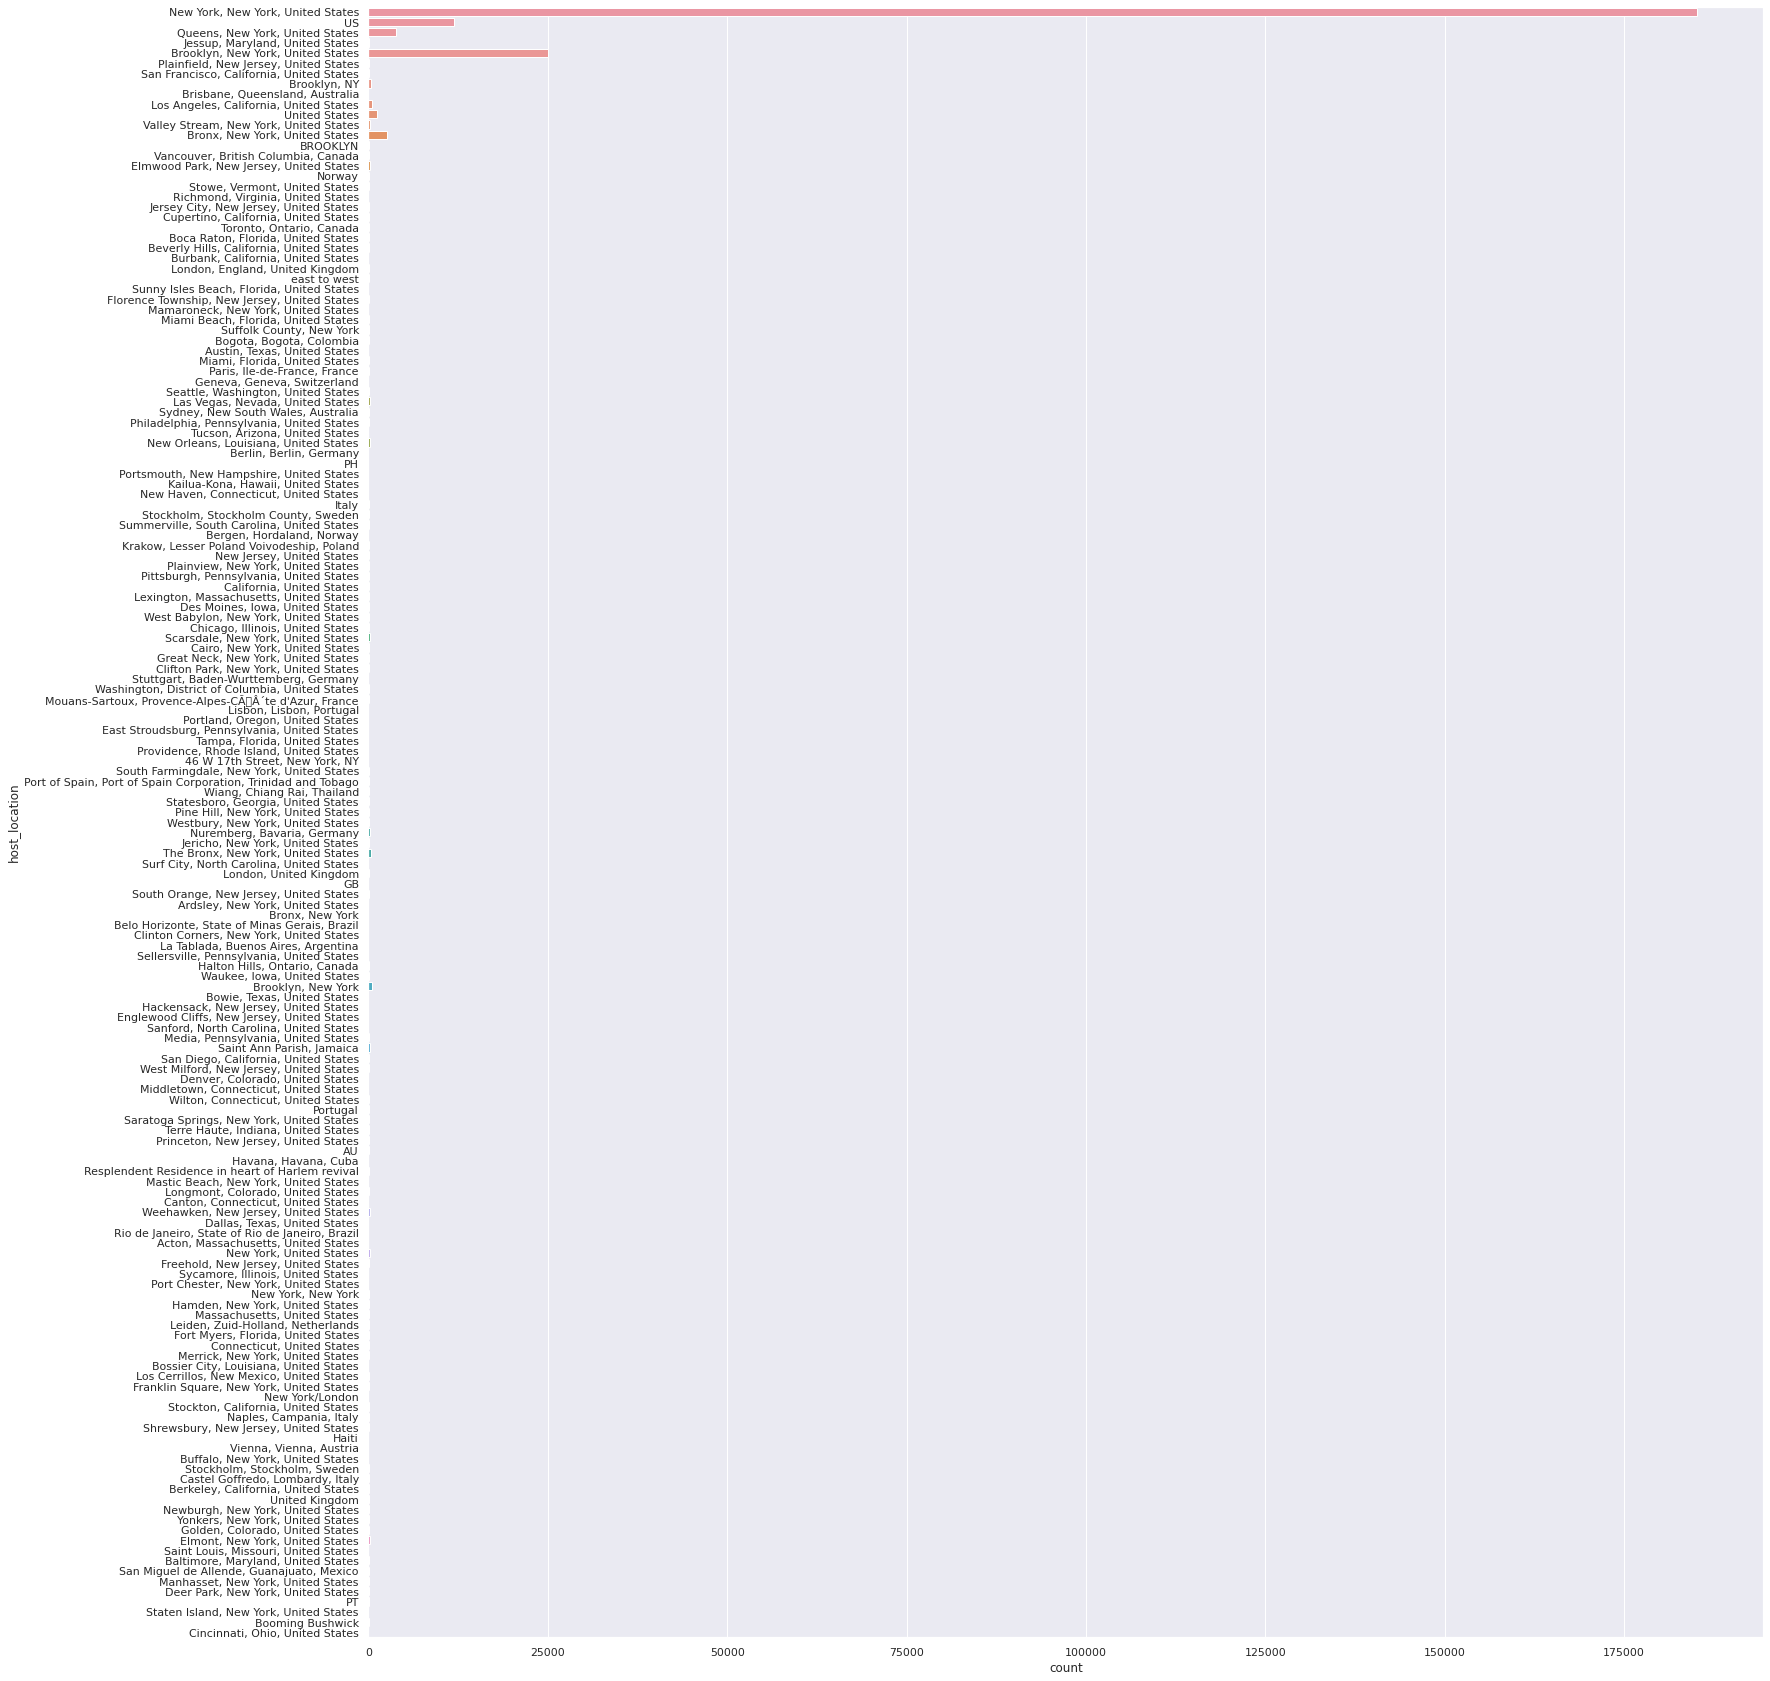

In [63]:
# Identifying the host locations with low value counts
sns.set(rc={'figure.figsize':(25,30)})
ax = sns.countplot(y="host_location", data=clean)

Text(0.5, 1.0, 'locations with the response_rate')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


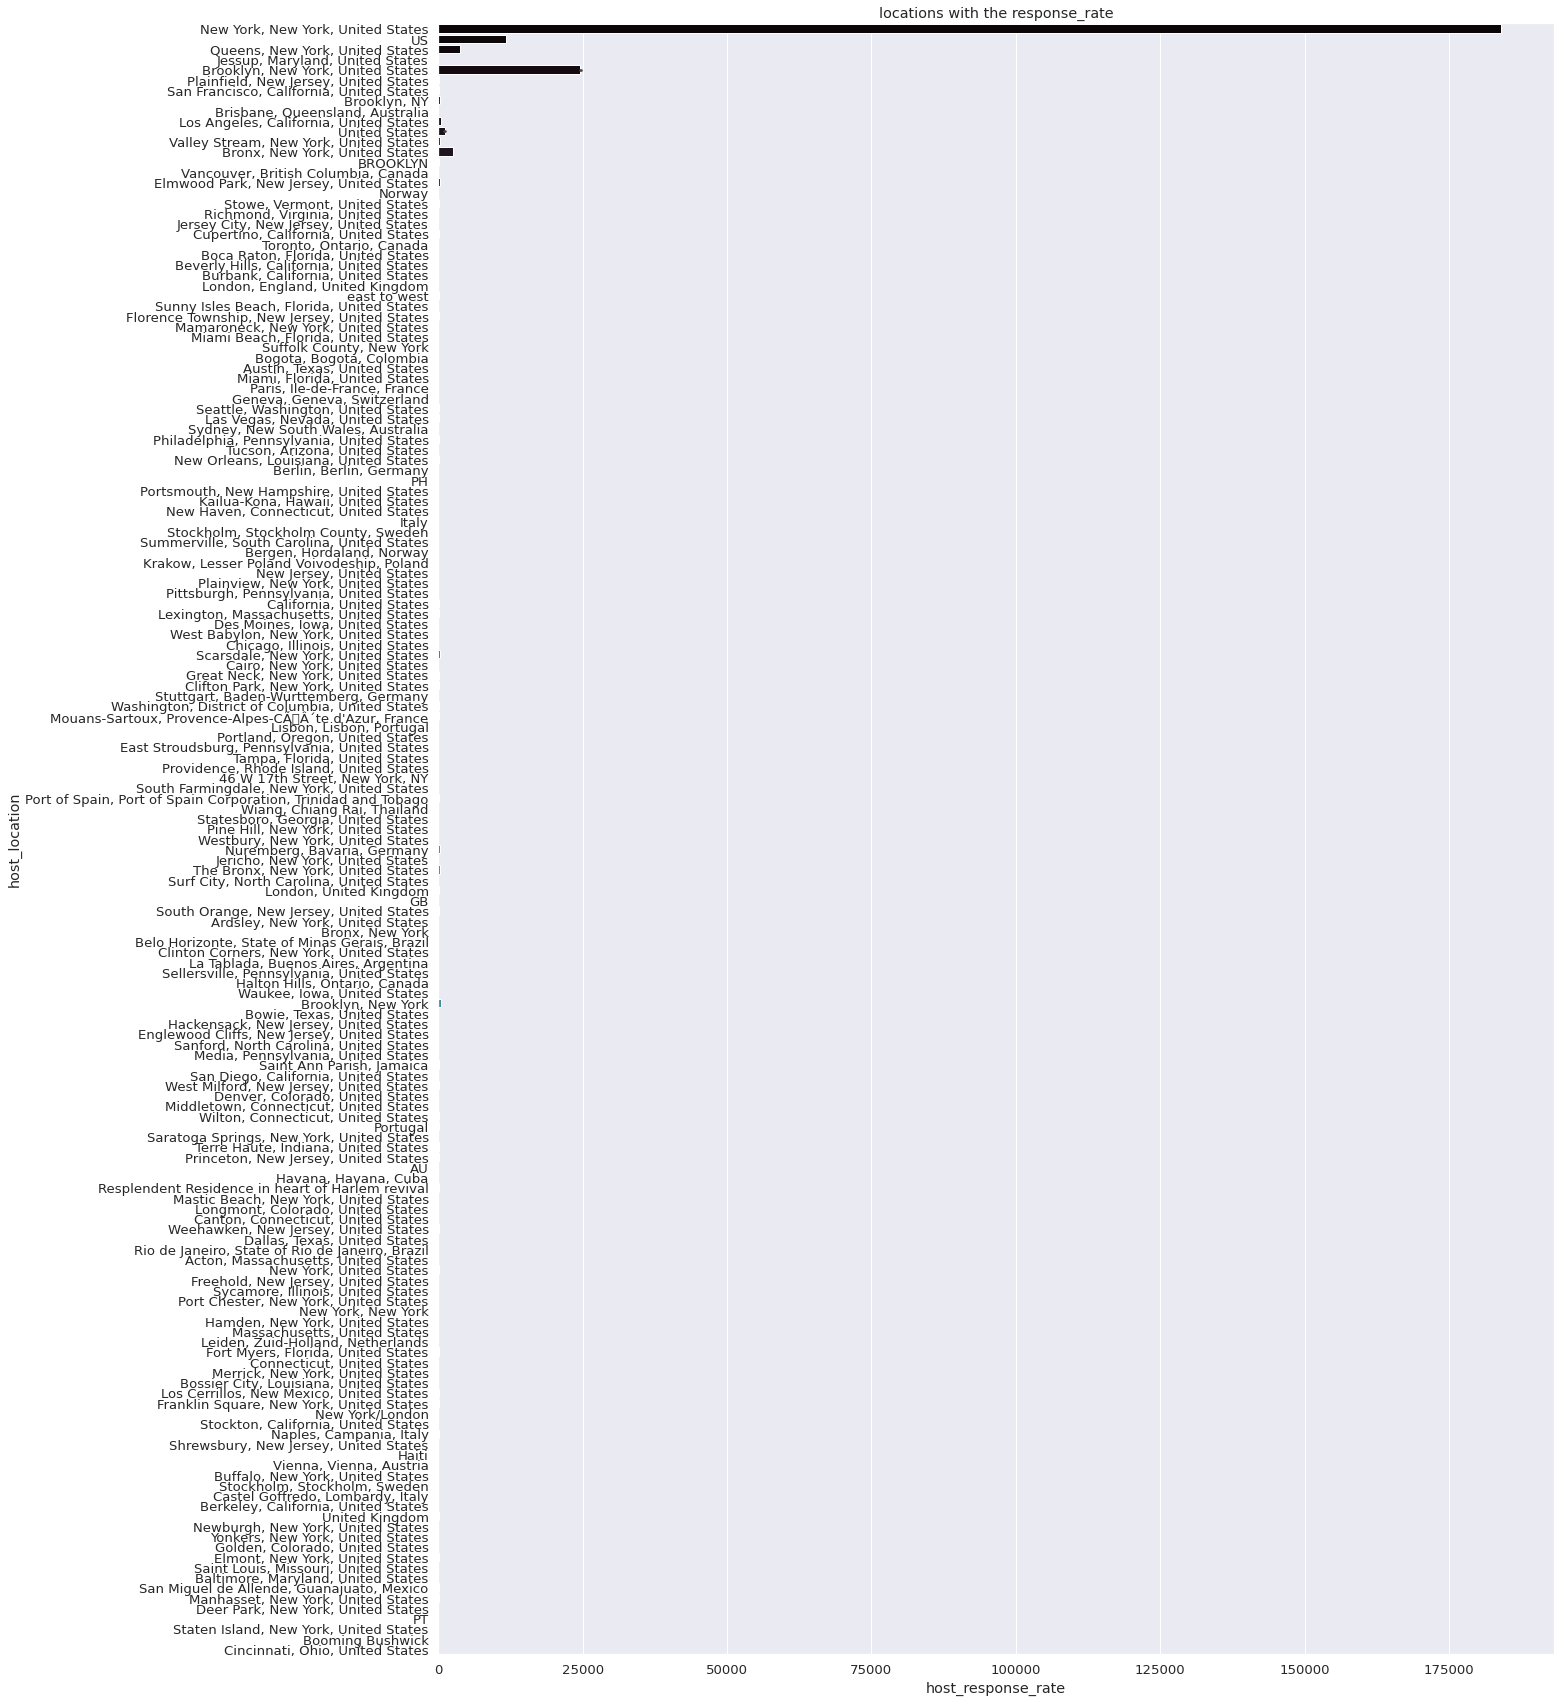

In [64]:
# identifying locations with high response_rate

plt.figure(figsize=(20,30))
sns.set(font_scale=1.2)
ax = sns.barplot(x ='host_response_rate',y='host_location', data=clean , estimator=sum , palette='mako')
ax.set_xlabel('host_response_rate')
ax.set_ylabel('host_location')
plt.title('locations with the response_rate')

Text(0.5, 1.0, 'locations with the acceptance_rate')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


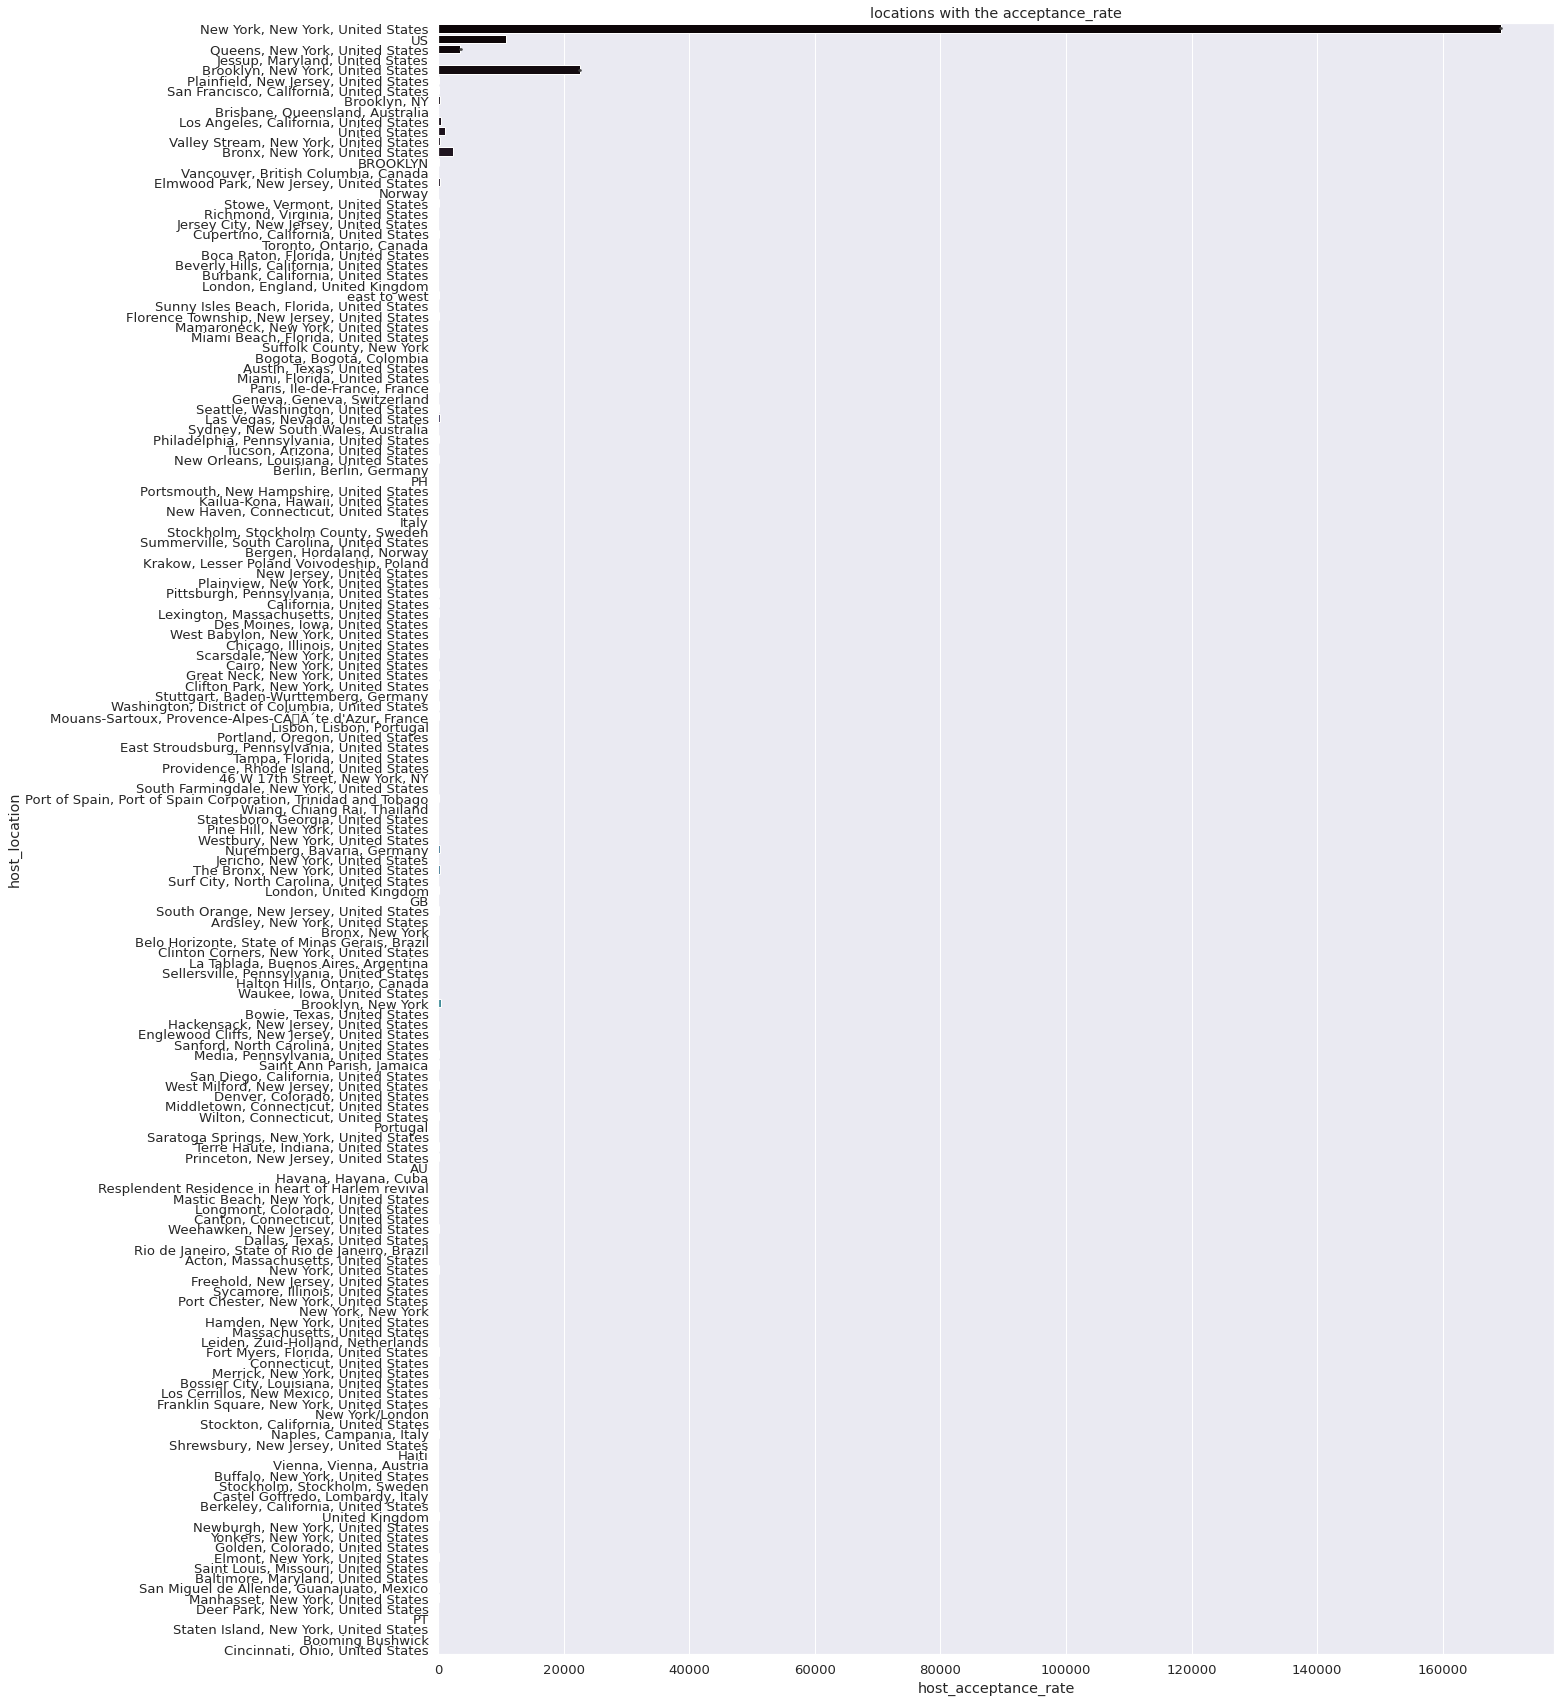

In [65]:
#identifying locations with high host_acceptance_rate
# identifying locations with high response_rate

plt.figure(figsize=(20,30))
sns.set(font_scale=1.2)
ax = sns.barplot(x ='host_acceptance_rate',y='host_location', data=clean , estimator=sum , palette='mako')
ax.set_xlabel('host_acceptance_rate')
ax.set_ylabel('host_location')
plt.title('locations with the acceptance_rate')

Text(0.5, 1.0, 'Bedrooms with comparison to prices')

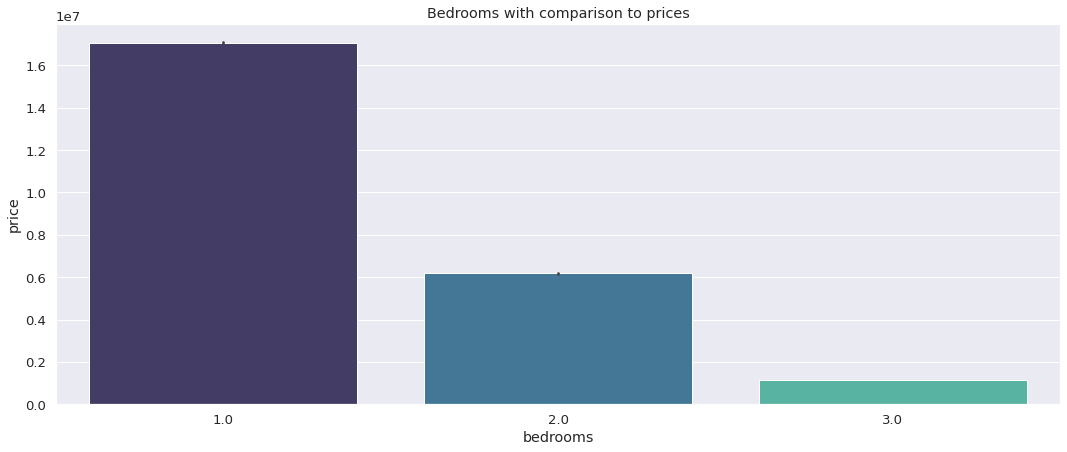

In [66]:
# plotting to get a comparison between price and the number of bedrooms
plt.figure(figsize=(18,7))
sns.set(font_scale=1.2)
ax = sns.barplot(x ='bedrooms',y='price', data=clean , estimator=sum , palette='mako')
ax.set_xlabel('bedrooms')
ax.set_ylabel('price')
plt.title('Bedrooms with comparison to prices')

Text(0.5, 1.0, 'room_type with comparison to prices')

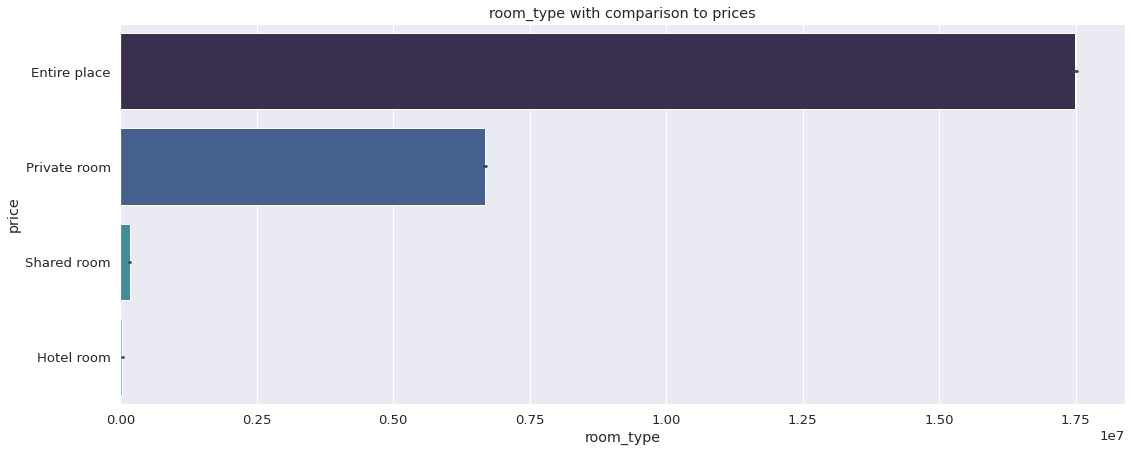

In [67]:
# plotting to get a comparison between price and the number the room_type
plt.figure(figsize=(18,7))
sns.set(font_scale=1.2)
ax = sns.barplot(x ='price',y='room_type', data=clean , estimator=sum , palette='mako')
ax.set_xlabel('room_type')
ax.set_ylabel('price')
plt.title('room_type with comparison to prices')

## **5. Recomendations**

i. As observed from the cleaned daset, its clear that the host locations with high value counts have high response rate and acceptance rate such as New York. This ay trigger the issue of competition in the market and thus the competition in those areas is high. I would recomend to invest in the areas where there aren't more copetition such as suerville, south carolina, which calls for a risk taker since the acceptance rate low as per the data provided; if your financial status isn't strong to hold competions. If you have  good reputation accompanied with good financial rigidness it would be advisable for you to invest in those areas with high acceptance rate and also response rate such as New York since it will yield good returns and the end of the day or both in the long run and short run.


ii. From the observation on the nuber of bedrooms and the prices, we can conlude that houses with 1 bedroom are yielding higher returns as compared to the houses with many bedroms, for the concern of profitability it would be brilliant that you invest more on the houses with less bedrooms since they are the ones giving higher returns. 

iii. The room types with the Entire place are the ones that are proving to have good prices. While investing they're are the best and recommendable ones to put into consideration copared to the hotel rooms

## **6. Action Points**

The company should provide a metric measure or a threshold to measure profitability, since this will act as a guiding principle of how the investments will be tweaked according to the recomendations.

# **Exercise 2**

## **1. Defining the question**

### **a) Specifying the Question**

To engage with the data in SQL to extract the desired data and import it into Python. Perform datacleanng cleaning and analysis. And then use either PowerBI or Tableau to create a report.

### **b) Defining the Metric for Success**

The analysis will be considered a success when interactive visualization which tell a good story from the data highlighting the key investment opportunities.

### **c) Recording the Experimental Design**

The experiantal desigh to be used is the CRISP-DM format:

1. Business understanding

2. Data Understanding

3. Data cleaning

4. Exploratory Data Analysis

### **d) Data Relevance**

The datasets are large enough to be used for analysis, thus promising a better outcome

### **e) Connecting to our Database**

In [68]:
import pandas as pd 

In [69]:
#loading the sql extension into our environment
%load_ext sql

# Then connect to our in memory sqlite database
 
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

In [70]:
# Loading our table from the respective CSV files 
deathrow = pd.read_csv('/content/tx_deathrow_full.csv')
deathrow.head(2)

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN


In [71]:
deathrow.shape

(553, 18)

In [72]:
# checking for the null values
deathrow.isna().sum()

Execution                    0
Date of Birth               14
Date of Offence             17
Highest Education Level     48
Last Name                    0
First Name                   0
TDCJ\nNumber                 0
Age at Execution             0
Date Received               14
Execution Date               0
Race                         0
County                       0
Eye Color                   35
Weight                      42
Height                      40
Native County               43
Native State                29
Last Statement             110
dtype: int64

In [73]:
# dropping the null values
dea = deathrow.dropna()
dea.shape

(388, 18)

In [74]:
# checking for duplicated values
dea.duplicated().sum()

0

In [75]:
dea.to_csv('cleaned.csv')

dea.to_excel('cleaned.xlsx')